<a href="https://colab.research.google.com/github/Ian-G27/Clase_MetodosNumericos/blob/main/FenomenoDeRunge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparacion de interpolaciones: Fenomeno de Runge**

Considere la funcion  $f(x)=1/(1 + 25x^2)$ en el intervalo $[1, 1].$ Tome 9 puntos igualmente espaciados: $x_0 = 1,..., x_5=0,...,x_9=1$





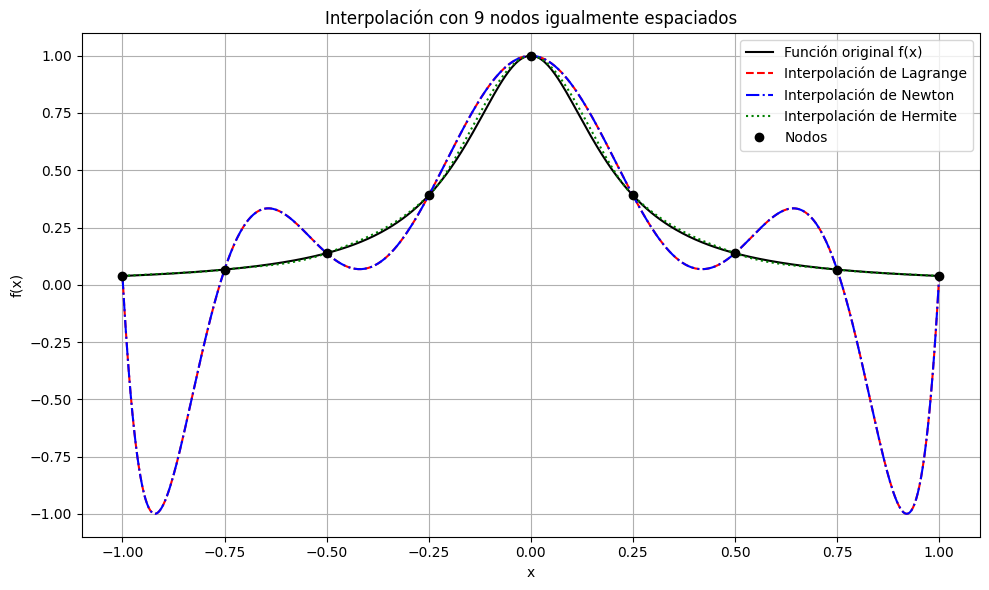

In [4]:
# importare las bibliotecas necesarias despues del reinicio
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator, KroghInterpolator
from scipy.interpolate import CubicHermiteSpline
#Definire la funcion que nos pide el problema
def f(x):
    return 1 / (1 + 25 * x**2)
#Generare los 9 nodos igualmente espaciados en [-1, 1]
x_nodos = np.linspace(-1, 1, 9)
y_nodos = f(x_nodos)
#Para Hermite, estimare las derivadas usando diferencias finitas centradas
dy_nodos = np.zeros_like(x_nodos)
dy_nodos[1:-1] = (y_nodos[2:] - y_nodos[:-2]) / (x_nodos[2] - x_nodos[0])
dy_nodos[0] = (y_nodos[1] - y_nodos[0]) / (x_nodos[1] - x_nodos[0])
dy_nodos[-1] = (y_nodos[-1] - y_nodos[-2]) / (x_nodos[-1] - x_nodos[-2])
#Creare los interpolantes
lagrange_polinomio = BarycentricInterpolator(x_nodos, y_nodos)
newton_polinomio = KroghInterpolator(x_nodos, y_nodos)
hermite_polinomio = CubicHermiteSpline(x_nodos, y_nodos, dy_nodos)
#Evaluare los puntos de una forma detallada para graficar
x_fine = np.linspace(-1, 1, 500)
y_true = f(x_fine)
y_lagrange = lagrange_polinomio(x_fine)
y_newton = newton_polinomio(x_fine)
y_hermite = hermite_polinomio(x_fine)
#Graficando
plt.figure(figsize=(10, 6))
plt.plot(x_fine, y_true, 'k-', label='Función original f(x)')
plt.plot(x_fine, y_lagrange, 'r--', label='Interpolación de Lagrange')
plt.plot(x_fine, y_newton, 'b-.', label='Interpolación de Newton')
plt.plot(x_fine, y_hermite, 'g:', label='Interpolación de Hermite')
plt.plot(x_nodos, y_nodos, 'ko', label='Nodos')
plt.title('Interpolación con 9 nodos igualmente espaciados')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Explicando la grafica obtenida

*  Curva negra: Es la función original.

*  Curva roja punteada: Es la interpolación de Lagrange.

*  Curva azul a trazos: Es la interpolación de Newton.

*  Curva verde punteada: Es la interpolación de Hermite.

*  Puntos negros: Son los nodos de interpolación.





#  Analisis

Se observa algunas oscilaciones grandes cerca de los extremos para Lagrange y Newton, que es algo que pasa a menudo cuando se usan muchos nodos igualmente espaciados en funciones con curvatura muy visible

Por parte de la interpolación de Hermite es más estable, ya que incorpora también las derivadas que ya estan estimadas aquí, lo que suaviza mucho el ajuste.

# Explicasion del Codigo:

*Bibliotecas utilizadas: *
```
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator, KroghInterpolator
from scipy.interpolate import CubicHermiteSpline

```
*  numpy: Es para las operaciones numéricas.

*  matplotlib.pyplot: Es para graficar.

*  BarycentricInterpolator: Es la interpolación de Lagrange eficiente.

*  KroghInterpolator: Es interpolación de Newton usando diferencias divididas.

*  CubicHermiteSpline: Es interpolación cúbica de Hermite la cual necesita las  derivadas.






# En esta parte se estiman las derivadas para Hermite

```
dy_nodes = np.zeros_like(x_nodes)
dy_nodes[1:-1] = (y_nodes[2:] - y_nodes[:-2]) / (x_nodes[2] - x_nodes[0])
dy_nodes[0] = (y_nodes[1] - y_nodes[0]) / (x_nodes[1] - x_nodes[0])
dy_nodes[-1] = (y_nodes[-1] - y_nodes[-2]) / (x_nodes[-1] - x_nodes[-2])

```

*  Se inicializa dy_nodos con ceros.

*  En el interior (1:-1), se usan diferencias centradas.

*  En los extremos (0 y -1), se usan diferencias hacia adelante y hacia atrás, respectivamente.

*  Esto es necesario porque Hermite necesita tanto f(x) como f'(x).





#  Se crean los polinomios que son los interpolantes

```
lagrange_polinomio = BarycentricInterpolator(x_nodos, y_nodos)
newton_polinomio = KroghInterpolator(x_nodos, y_nodos)
hermite_polinomio = CubicHermiteSpline(x_nodos, y_nodos, dy_nodos)

```
*  Lagrange: usando BarycentricInterpolator, que es eficiente y estable

*  Newton: usando KroghInterpolator, que internamente usa diferencias divididas

*  Hermite: usando CubicHermiteSpline, usando también las derivadas estimadas






# En esta parte se evaluan los puntos de cada interpolante para graficar

```
x_fine = np.linspace(-1, 1, 500)
y_true = f(x_fine)
y_lagrange = lagrange_poly(x_fine)
y_newton = newton_poly(x_fine)
y_hermite = hermite_poly(x_fine)

```
*  x_fine: Son los 500 puntos para ver las curvas de forma mas detallada

*  y_true: Es la función original

*  y_lagrange, y_newton, y_hermite: Son las evaluaciones de cada interpolante






# 2. Aumente el numero de nodos, analice y comente lo que ocurre

# Utlizando el mismo codigo solo haciendole algunos cambios tengo

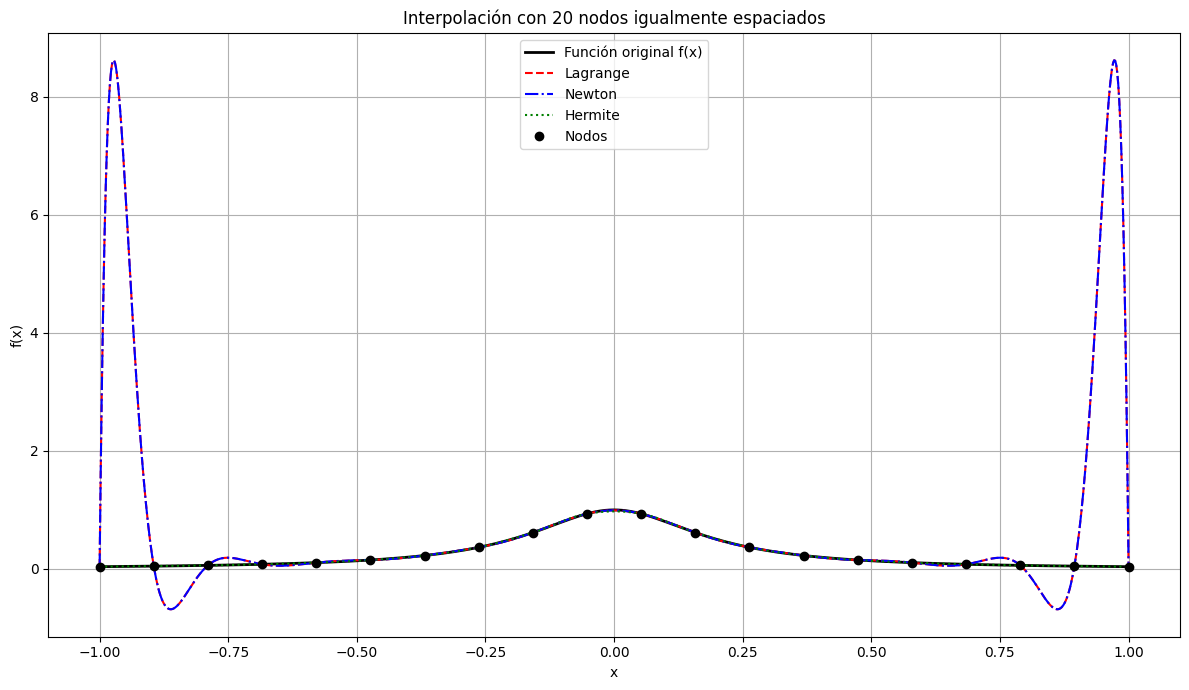

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator, KroghInterpolator, CubicHermiteSpline
#Definiendo la funcion que nos pide
def f(x):
    return 1 / (1 + 25 * x**2)
#Parametro: Es el numero de nodos que se desea (se puede cambiar a 9, 20, 40, 80, etc.)
num_nodos = 20
# De igual forma se generaran nodos igualmente espaciados en [-1, 1]
x_nodos = np.linspace(-1, 1, num_nodos)
y_nodos = f(x_nodos)
# Estimacion de derivadas usando diferencias finitas centradas
dy_nodos = np.zeros_like(x_nodos)
dy_nodos[1:-1] = (y_nodos[2:] - y_nodos[:-2]) / (x_nodos[2:] - x_nodos[:-2])
dy_nodos[0] = (y_nodos[1] - y_nodos[0]) / (x_nodos[1] - x_nodos[0])
dy_nodos[-1] = (y_nodos[-1] - y_nodos[-2]) / (x_nodos[-1] - x_nodos[-2])
# Creacion de los interpolantes
lagrange_polinomio = BarycentricInterpolator(x_nodos, y_nodos)
newton_polinomio = KroghInterpolator(x_nodos, y_nodos)
hermite_polinomio = CubicHermiteSpline(x_nodos, y_nodos, dy_nodos)
# Evaluare los puntos de una forma detallada para graficar
x_fine = np.linspace(-1, 1, 1000)
y_true = f(x_fine)
y_lagrange = lagrange_polinomio(x_fine)
y_newton = newton_polinomio(x_fine)
y_hermite = hermite_polinomio(x_fine)
# Graficando
plt.figure(figsize=(12, 7))
plt.plot(x_fine, y_true, 'k-', label='Función original f(x)', linewidth=2)
plt.plot(x_fine, y_lagrange, 'r--', label='Lagrange')
plt.plot(x_fine, y_newton, 'b-.', label='Newton')
plt.plot(x_fine, y_hermite, 'g:', label='Hermite')
plt.plot(x_nodos, y_nodos, 'ko', label='Nodos')
plt.title(f'Interpolación con {num_nodos} nodos igualmente espaciados')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#  Cambios con respecto al codigo anterior

*  num_nodos parametrizado:	Se puede cambiar el numero de nodos
*  Derivadas centradas dinamicas: Se adapta automaticamente a cualquier numero
*  Grafico dinamico con titulo adaptable:	Se actualiza según el número de nodos



Cuando se aumentan los nodos equiespaciados a 20 como en este caso:

*  Lagrange y Newton empiezan a comportarse peor en los extremos

*  Hermite es mucho mas confiable porque suaviza con cubicos por tramos

*  Esto nos confirma que usar muchos nodos con polinomios de alto grado y nodos equiespaciados no siempre es buena idea
